In [17]:
  #Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

#Analyze time complexity
--------------------------


## 1. Fixed S & varying "n" input list


In [18]:
url = "FixedS_VaryingN/S_16_VaryingN_10000000.csv"
S16_varyingN_DF = pd.read_csv(url)
url = "FixedS_VaryingN/S_32_VaryingN_10000000.csv"
S32_varyingN_DF = pd.read_csv(url)
url = "FixedS_VaryingN/S_64_VaryingN_10000000.csv"
S64_varyingN_DF = pd.read_csv(url)
url = "FixedS_VaryingN/S_128_VaryingN_10000000.csv"
S128_varyingN_DF = pd.read_csv(url)


In [19]:
dataframes = [S16_varyingN_DF, S32_varyingN_DF, S64_varyingN_DF, S128_varyingN_DF]
#compute average and best cases and populate it into the last 2 columns

for df in dataframes:
  for index, rows in df.iterrows():
    s = df["S"]
    n = df["Size(n)"]
    df["Best Case"] = n + (n * (np.log2(n/s)))
    df["Average Case"] = (n * s) + (n * (np.log2(n / s)))
    df["Merge Sort"] = n*(np.log2(n/s))

S16_varyingN_DF

,Size(n),S,Key Comparisons,Time(ms),Time(s),Best Case,Average Case,Merge Sort
0,10000,16,123273,4.8525,0.004853,1.028771e+05,2.528771e+05,9.287712e+04
1,20000,16,266390,2.8388,0.002839,2.257542e+05,5.257542e+05,2.057542e+05
2,30000,16,440571,3.3669,0.003367,3.561802e+05,8.061802e+05,3.261802e+05
3,40000,16,573384,6.3399,0.006340,4.915085e+05,1.091508e+06,4.515085e+05
4,50000,16,752143,4.7447,0.004745,6.304820e+05,1.380482e+06,5.804820e+05
...,...,...,...,...,...,...,...,...
995,9960000,16,221644317,959.1687,0.959169,2.016672e+08,3.510672e+08,1.917072e+08
996,9970000,16,221884676,947.2555,0.947256,2.018841e+08,3.514341e+08,1.919141e+08
997,9980000,16,222143414,957.8822,0.957882,2.021011e+08,3.518011e+08,1.921211e+08
998,9990000,16,222382418,960.3493,0.960349,2.023180e+08,3.521680e+08,1.923280e+08


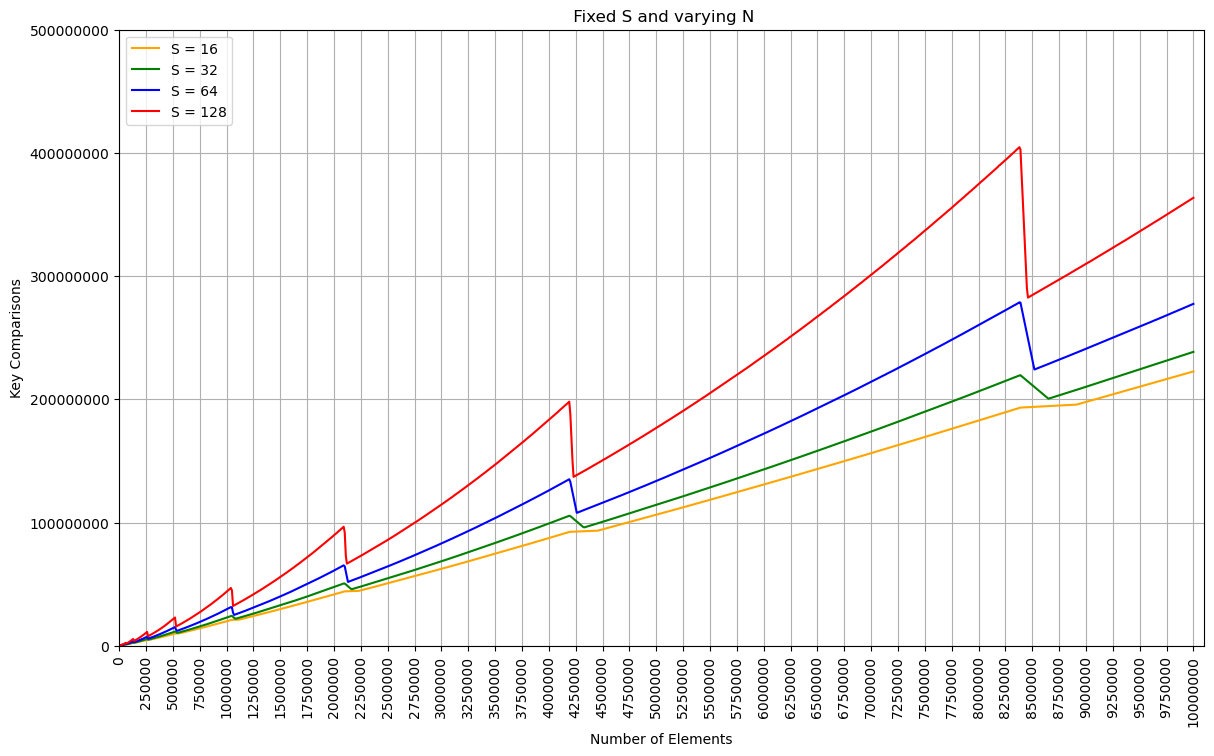

In [20]:
#Create a matplotlib plot
f = plt.figure(figsize = (14,8))
ax = f.add_subplot(1,1,1)

plt.title(' Fixed S and varying N')
plt.xlabel('Number of Elements')
plt.ylabel('Key Comparisons')
plt.xticks(rotation = 90)
plt.grid()

interval_step = 250000
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(interval_step))
#increase x and y limits
ax.set_xlim([0, 10100000])
ax.set_ylim([0, 500000000])

#plots the various graphs
ax.plot(S16_varyingN_DF ["Size(n)"],S16_varyingN_DF ["Key Comparisons"], color = "orange", label = "S = 16")
ax.plot(S32_varyingN_DF ["Size(n)"],S32_varyingN_DF ["Key Comparisons"], color = "green", label = "S = 32")
ax.plot(S64_varyingN_DF ["Size(n)"],S64_varyingN_DF ["Key Comparisons"], color = "blue", label = "S = 64")
ax.plot(S128_varyingN_DF ["Size(n)"],S128_varyingN_DF ["Key Comparisons"], color = "red", label = "S = 128")

#plot legends
plt.legend(loc = "upper left")
plt.ticklabel_format(style='plain')


0         10000
1         20000
2         30000
3         40000
4         50000
         ...   
995     9960000
996     9970000
997     9980000
998     9990000
999    10000000
Name: Size(n), Length: 1000, dtype: int64


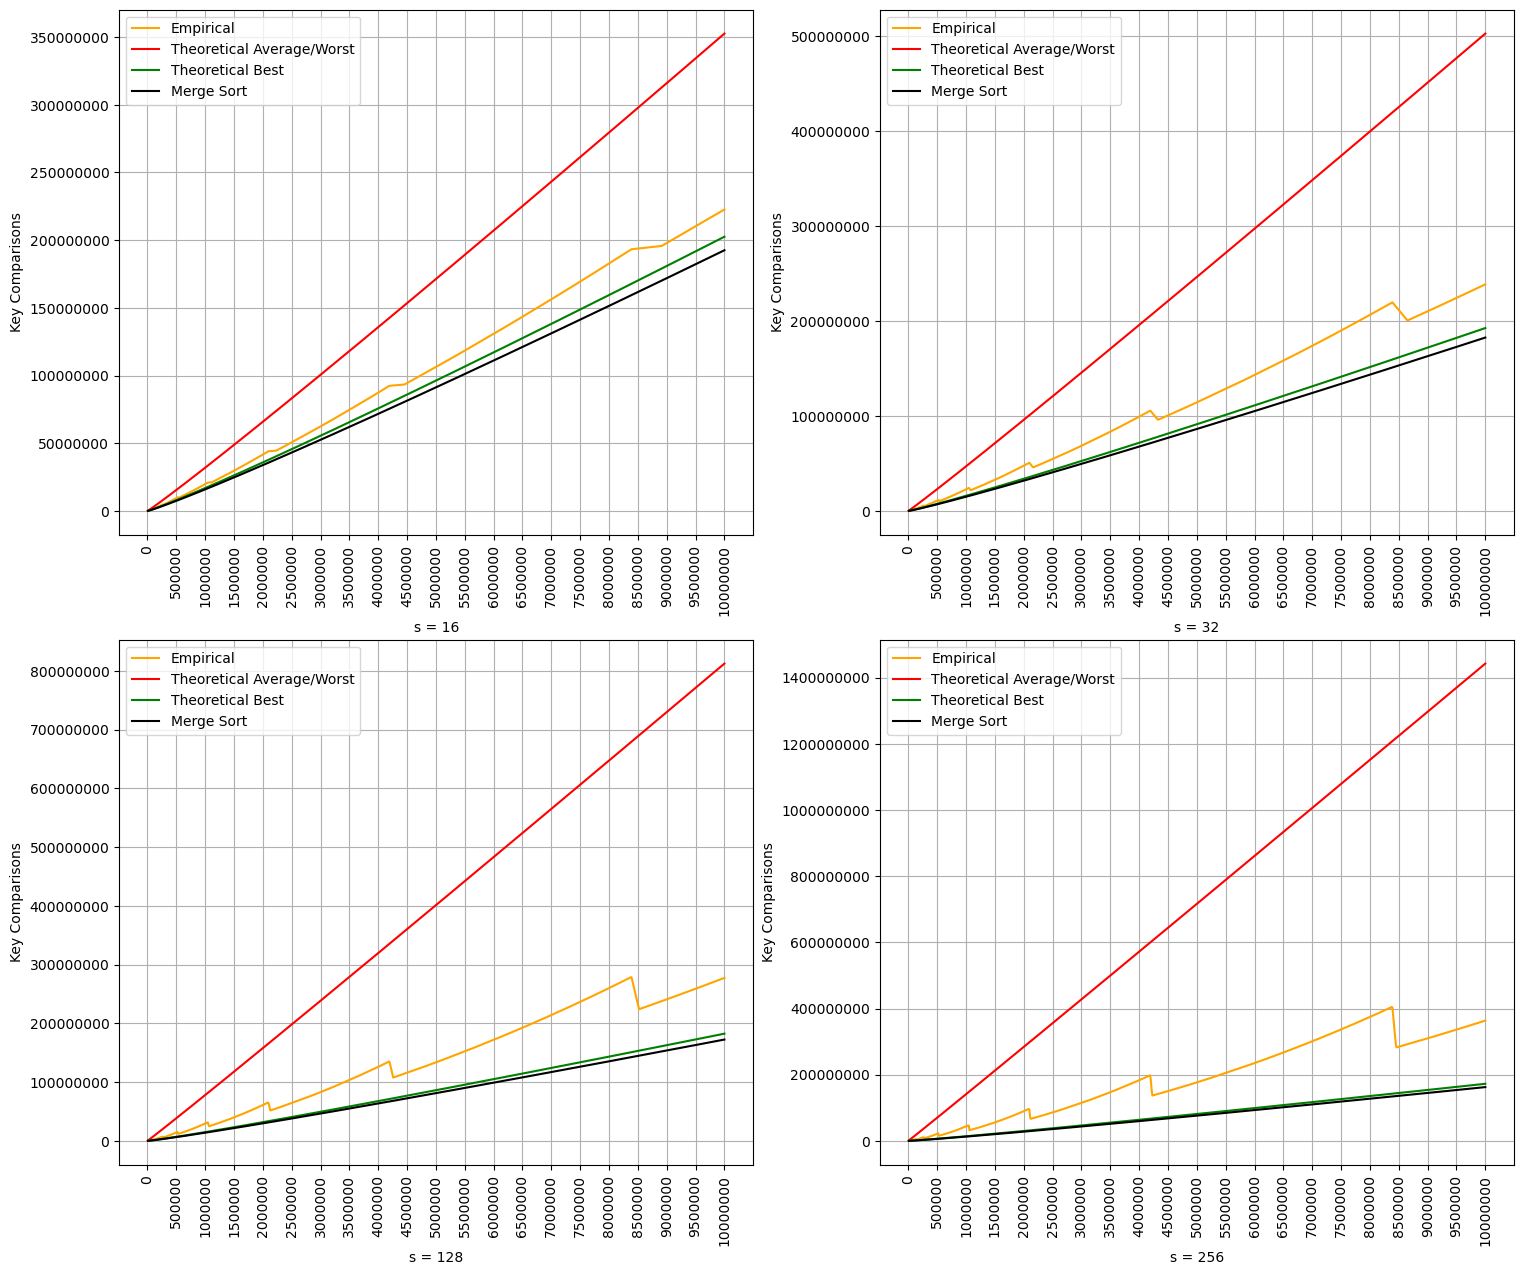

In [21]:
fig, ax = plt.subplots(2,2, figsize =(18,15))
dataframes = [S16_varyingN_DF, S32_varyingN_DF,S64_varyingN_DF, S128_varyingN_DF]
#xlabels = [16,32,128,256]
xlabels = [16,32,128,256]

print(n)
#loop through dataframes and xlabels to plot the 4 different graphs
k = 0
for i in range(2):
  for j in range(2):
    if i * 2 + j < len(dataframes):
      df = dataframes[i * 2 + j]
      ax[i,j].plot(df["Size(n)"], df["Key Comparisons"], label = "Empirical", color = "orange")
      ax[i,j].plot(df["Size(n)"], df["Average Case"], label = "Theoretical Average/Worst", color = "red")
      ax[i,j].plot(df["Size(n)"], df["Best Case"] , label = "Theoretical Best", color = "green")
      ax[i,j].plot(df["Size(n)"], df["Merge Sort"] , label = "Merge Sort", color = "black")
      k+=1

#visual UI
k = 0
for i in range(2):
    for j in range(2):
        ax[i,j].set_xlabel(f"s = {xlabels[k]}")
        ax[i,j].set_ylabel("Key Comparisons")
        ax[i,j].ticklabel_format(style='plain', axis='both')
        ax[i,j].tick_params(axis = "x", rotation = 90)
        ax[i,j].xaxis.set_major_locator(ticker.MultipleLocator(500000))
        #ax[i,j].yaxis.set_major_locator(ticker.MultipleLocator(500000000))
        ax[i,j].legend(loc = "upper left")

        ax[i,j].grid()
        k+=1
plt.show()

##2. Fixed N & varying "s" threshold size of subarrays

### compare keycomparison? compare time taken?


In [22]:

url = "FixedN_VaryingS/N_100000_S_1to128.csv"
N100k_varyingS_DF = pd.read_csv(url)
url = "FixedN_VaryingS/N_500000_S_1to128.csv"
N500k_varyingS_DF = pd.read_csv(url)
url = "FixedN_VaryingS/N_1000000_S_1to128.csv"
N1m_varyingS_DF = pd.read_csv(url)
url = "FixedN_VaryingS/N_5000000_S_1to128.csv"
N5m_varyingS_DF = pd.read_csv(url)
url = "FixedN_VaryingS/N_10000000_S_1to128.csv"
N10m_varyingS_DF = pd.read_csv(url)
url = "FixedN_VaryingS/N_100000000_S_1to128.csv"
N100m_varyingS_DF = pd.read_csv(url)

In [23]:
N100m_varyingS_DF

,Size(n),S,Key Comparisons,Time(ms),Time(s)
0,100000000,1,2511456896,16957.6618,16.957662
1,100000000,2,2511456896,15102.2136,15.102214
2,100000000,3,2511450282,14484.8456,14.484846
3,100000000,4,2511450282,15065.1425,15.065143
4,100000000,5,2511812644,14544.5307,14.544531
...,...,...,...,...,...
123,100000000,124,4430360476,14884.5501,14.884550
124,100000000,125,4430360476,14524.5283,14.524528
125,100000000,126,4430360476,14641.4605,14.641461
126,100000000,127,4430360476,14594.7695,14.594770


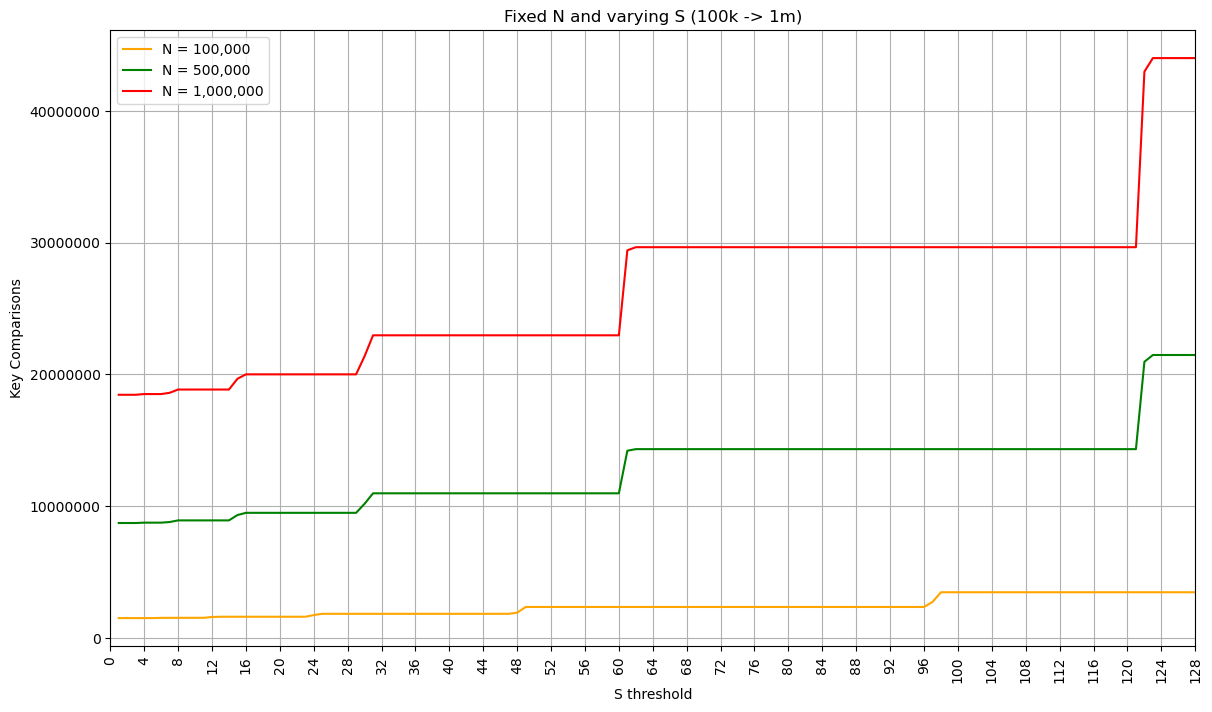

In [24]:
#Create a matplotlib plot
f = plt.figure(figsize = (14,8))
ax = f.add_subplot(1,1,1)

plt.title('Fixed N and varying S (100k -> 1m)')
plt.xlabel('S threshold')
plt.ylabel('Key Comparisons')
plt.xticks(rotation = 90)
plt.grid()

interval_step = 4
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(interval_step))
#increase x and y limits
ax.set_xlim([0, 128])
#ax.set_ylim([0, 50000000])

ax.plot(N100k_varyingS_DF ["S"],N100k_varyingS_DF ["Key Comparisons"], color = "orange", label = "N = 100,000")
ax.plot(N500k_varyingS_DF ["S"],N500k_varyingS_DF ["Key Comparisons"], color = "green", label = "N = 500,000")
ax.plot(N1m_varyingS_DF ["S"],N1m_varyingS_DF ["Key Comparisons"], color = "red", label = "N = 1,000,000")

#plot legends
plt.legend(loc = "upper left")
plt.ticklabel_format(style='plain')

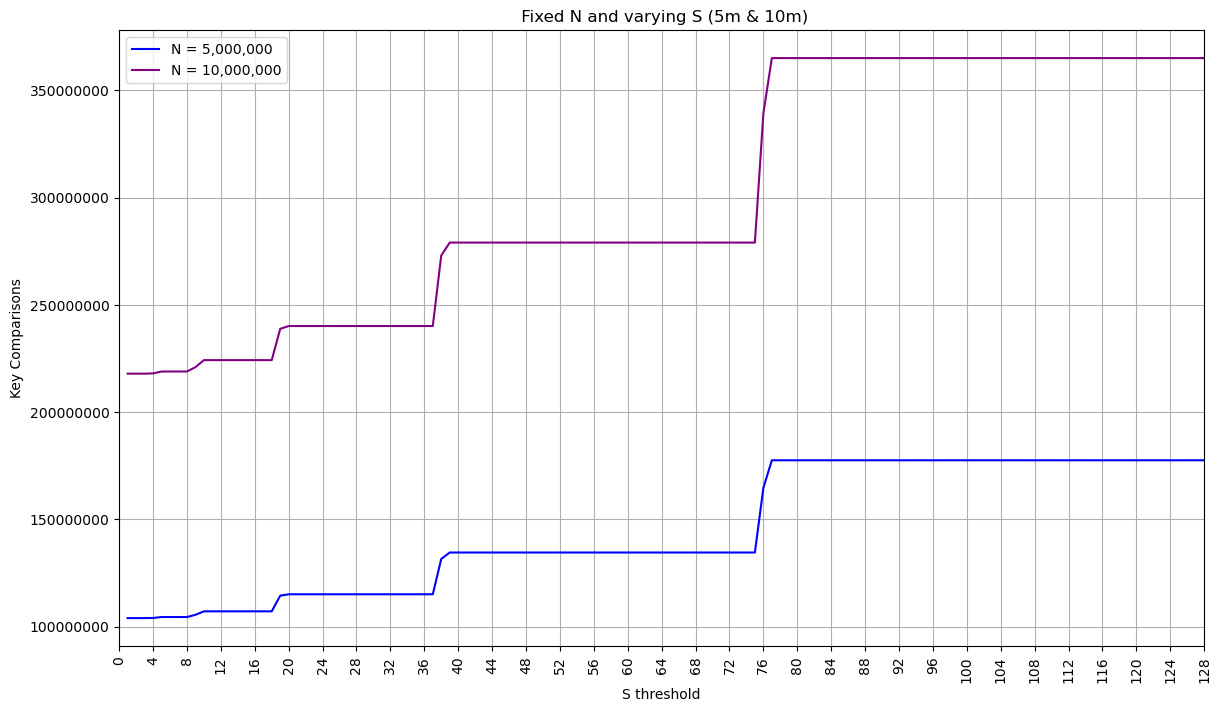

In [25]:
#Create a matplotlib plot
f = plt.figure(figsize = (14,8))
ax = f.add_subplot(1,1,1)

plt.title(' Fixed N and varying S (5m & 10m)')
plt.xlabel('S threshold')
plt.ylabel('Key Comparisons')
plt.xticks(rotation = 90)
plt.grid()

interval_step = 4
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(interval_step))
#increase x and y limits
ax.set_xlim([0, 128])
#ax.set_ylim([0, 50000000])


ax.plot(N5m_varyingS_DF ["S"],N5m_varyingS_DF ["Key Comparisons"], color = "blue", label = "N = 5,000,000")
ax.plot(N10m_varyingS_DF ["S"],N10m_varyingS_DF ["Key Comparisons"],  color = "purple", label = "N = 10,000,000")
#ax.plot(N10m_varyingS_DF ["S"],N100m_varyingS_DF ["Key Comparisons"],  color = "black", label = "N = 100,000,000")
#plot legends
plt.legend(loc = "upper left")
plt.ticklabel_format(style='plain')

In [26]:
# Dataframes and xlabels
dataframes = [N100k_varyingS_DF, N500k_varyingS_DF, N1m_varyingS_DF, N5m_varyingS_DF, N10m_varyingS_DF, N100m_varyingS_DF]
#compute average and best cases and populate it into the last 2 columns
for df in dataframes:
  for index, rows in df.iterrows():
    s = df["S"]
    n = df["Size(n)"]
    df["Best Case"] = n + (n * (np.log2(n/s)))
    df["Average Case"] = (n * s) + (n * (np.log2(n / s)))
  display(df.head(127))

,Size(n),S,Key Comparisons,Time(ms),Time(s),Best Case,Average Case
0,100000,1,1515145,24.144500,0.024144,1.760964e+06,1.760964e+06
1,100000,2,1515145,11.831625,0.011832,1.660964e+06,1.760964e+06
2,100000,3,1515039,10.372708,0.010373,1.602468e+06,1.802468e+06
3,100000,4,1515421,9.232167,0.009232,1.560964e+06,1.860964e+06
4,100000,5,1515421,7.323292,0.007323,1.528771e+06,1.928771e+06
...,...,...,...,...,...,...,...
122,100000,123,3475708,8.468166,0.008468,1.066713e+06,1.326671e+07
123,100000,124,3475708,8.430250,0.008430,1.065544e+06,1.336554e+07
124,100000,125,3475708,8.380167,0.008380,1.064386e+06,1.346439e+07
125,100000,126,3475708,8.402958,0.008403,1.063236e+06,1.356324e+07


,Size(n),S,Key Comparisons,Time(ms),Time(s),Best Case,Average Case
0,500000,1,8730221,68.095625,0.068096,9.965784e+06,9.965784e+06
1,500000,2,8730221,50.876834,0.050877,9.465784e+06,9.965784e+06
2,500000,3,8730209,47.102625,0.047103,9.173303e+06,1.017330e+07
3,500000,4,8757032,42.439500,0.042439,8.965784e+06,1.046578e+07
4,500000,5,8757032,42.858791,0.042859,8.804820e+06,1.080482e+07
...,...,...,...,...,...,...,...
122,500000,123,21478656,53.197125,0.053197,6.494527e+06,6.749453e+07
123,500000,124,21478656,53.209417,0.053209,6.488686e+06,6.798869e+07
124,500000,125,21478656,52.685375,0.052685,6.482892e+06,6.848289e+07
125,500000,126,21478656,52.784833,0.052785,6.477144e+06,6.897714e+07


,Size(n),S,Key Comparisons,Time(ms),Time(s),Best Case,Average Case
0,1000000,1,18460380,120.949375,0.120949,2.093157e+07,2.093157e+07
1,1000000,2,18460380,101.032209,0.101032,1.993157e+07,2.093157e+07
2,1000000,3,18460355,95.226625,0.095227,1.934661e+07,2.134661e+07
3,1000000,4,18513622,90.998875,0.090999,1.893157e+07,2.193157e+07
4,1000000,5,18513622,88.418708,0.088419,1.860964e+07,2.260964e+07
...,...,...,...,...,...,...,...
122,1000000,123,44006992,109.546792,0.109547,1.398905e+07,1.359891e+08
123,1000000,124,44006992,109.585417,0.109585,1.397737e+07,1.369774e+08
124,1000000,125,44006992,110.955875,0.110956,1.396578e+07,1.379658e+08
125,1000000,126,44006992,109.815583,0.109816,1.395429e+07,1.389543e+08


,Size(n),S,Key Comparisons,Time(ms),Time(s),Best Case,Average Case
0,5000000,1,103978313,573.557042,0.573557,1.162675e+08,1.162675e+08
1,5000000,2,103978313,525.347334,0.525347,1.112675e+08,1.162675e+08
2,5000000,3,103978317,509.225083,0.509225,1.083427e+08,1.183427e+08
3,5000000,4,104039024,504.526583,0.504527,1.062675e+08,1.212675e+08
4,5000000,5,104482248,495.646125,0.495646,1.046578e+08,1.246578e+08
...,...,...,...,...,...,...,...
122,5000000,123,177567444,537.317083,0.537317,8.155491e+07,6.915549e+08
123,5000000,124,177567444,536.388584,0.536389,8.149650e+07,6.964965e+08
124,5000000,125,177567444,536.777125,0.536777,8.143856e+07,7.014386e+08
125,5000000,126,177567444,535.921834,0.535922,8.138108e+07,7.063811e+08


,Size(n),S,Key Comparisons,Time(ms),Time(s),Best Case,Average Case
0,10000000,1,217954314,1219.029417,1.219029,2.425350e+08,2.425350e+08
1,10000000,2,217954314,1087.181334,1.087181,2.325350e+08,2.425350e+08
2,10000000,3,217954972,1090.244708,1.090245,2.266853e+08,2.466853e+08
3,10000000,4,218076652,1060.859375,1.060859,2.225350e+08,2.525350e+08
4,10000000,5,218961986,1031.285792,1.031286,2.193157e+08,2.593157e+08
...,...,...,...,...,...,...,...
122,10000000,123,365107337,1107.412333,1.107412,1.731098e+08,1.393110e+09
123,10000000,124,365107337,1127.735916,1.127736,1.729930e+08,1.402993e+09
124,10000000,125,365107337,1109.893750,1.109894,1.728771e+08,1.412877e+09
125,10000000,126,365107337,1107.093292,1.107093,1.727622e+08,1.422762e+09


,Size(n),S,Key Comparisons,Time(ms),Time(s),Best Case,Average Case
0,100000000,1,2511456896,16957.6618,16.957662,2.757542e+09,2.757542e+09
1,100000000,2,2511456896,15102.2136,15.102214,2.657542e+09,2.757542e+09
2,100000000,3,2511450282,14484.8456,14.484846,2.599046e+09,2.799046e+09
3,100000000,4,2511450282,15065.1425,15.065143,2.557542e+09,2.857542e+09
4,100000000,5,2511812644,14544.5307,14.544531,2.525350e+09,2.925350e+09
...,...,...,...,...,...,...,...
122,100000000,123,4430360476,14787.5118,14.787512,2.063291e+09,1.426329e+10
123,100000000,124,4430360476,14884.5501,14.884550,2.062123e+09,1.436212e+10
124,100000000,125,4430360476,14524.5283,14.524528,2.060964e+09,1.446096e+10
125,100000000,126,4430360476,14641.4605,14.641461,2.059814e+09,1.455981e+10


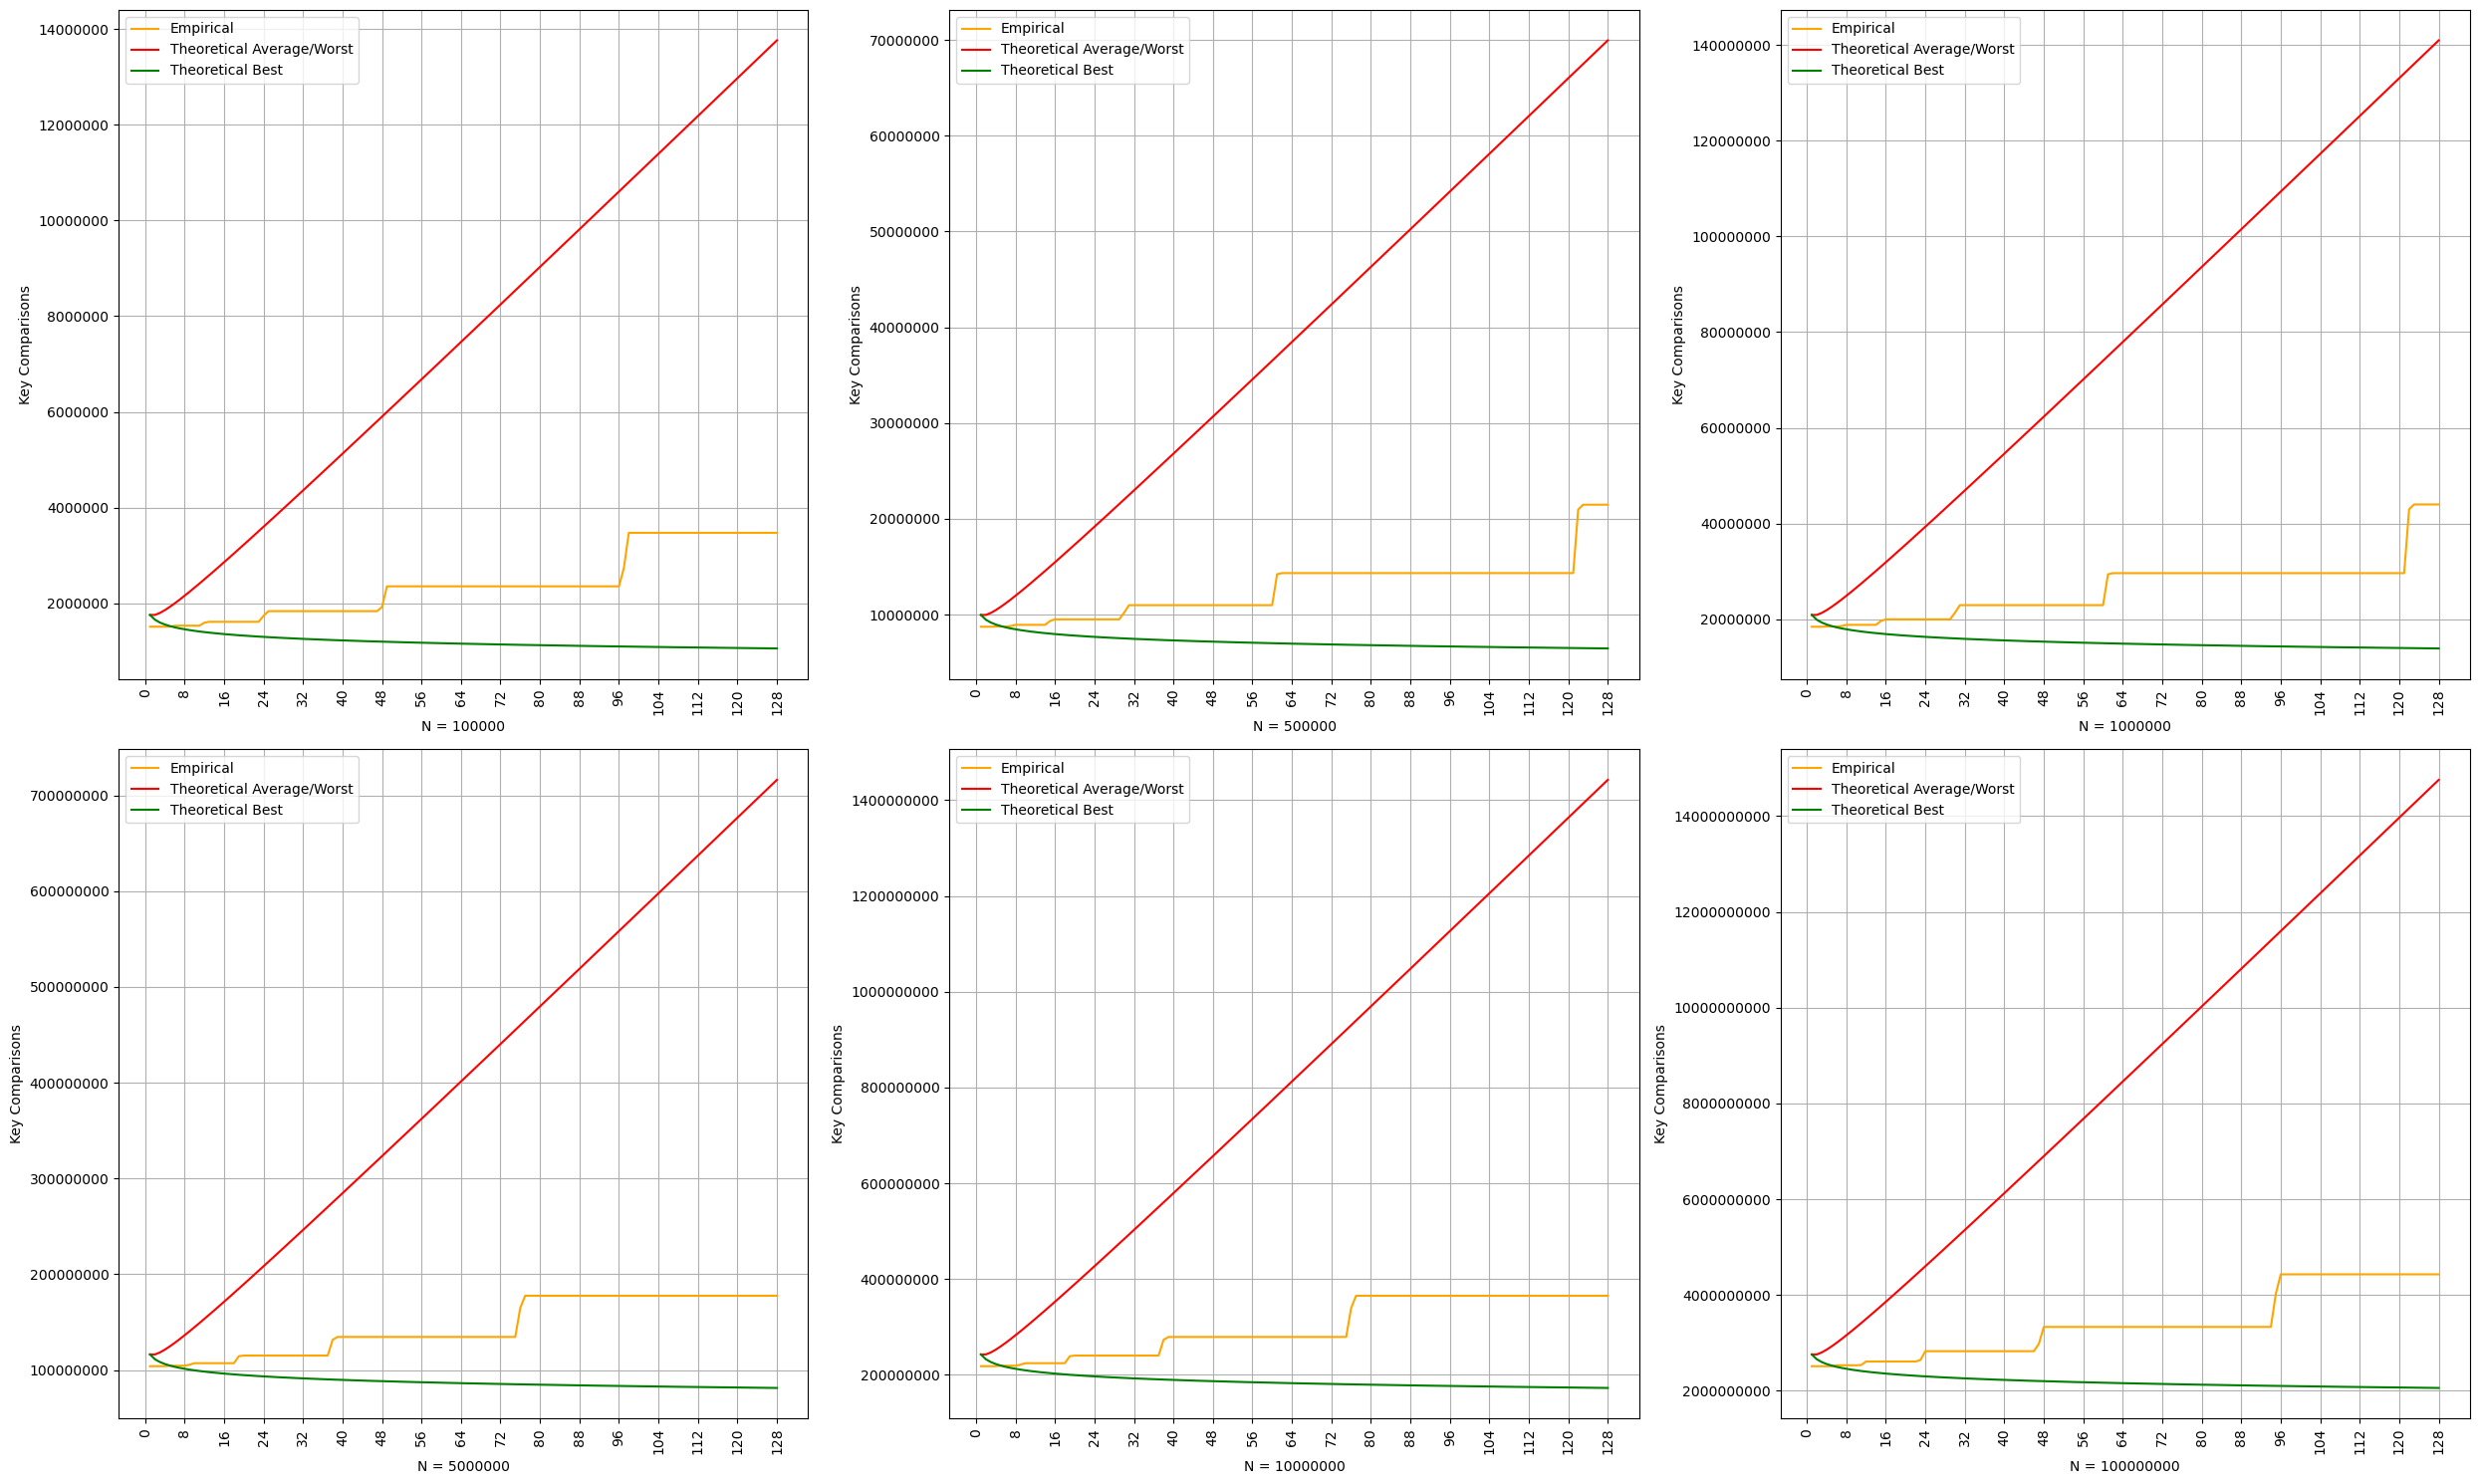

In [27]:
# Dataframes and xlabels
dataframes = [N100k_varyingS_DF, N500k_varyingS_DF, N1m_varyingS_DF, N5m_varyingS_DF, N10m_varyingS_DF, N100m_varyingS_DF]
xlabels = [100000, 500000, 1000000, 5000000, 10000000,100000000]

# Create a 2x3 grid of subplots to accommodate 5 graphs
fig, ax = plt.subplots(2, 3, figsize=(25, 15))


# loop through dataframes and xlabels to plot the 5 different graphs
k = 0
for i in range(2):
    for j in range(3):
        if i * 3 + j < len(dataframes):
            df = dataframes[i * 3 + j]
            ax[i, j].plot(df["S"], df["Key Comparisons"], label="Empirical", color="orange")
            ax[i, j].plot(df["S"], df["Average Case"], label="Theoretical Average/Worst", color="red")
            ax[i, j].plot(df["S"], df["Best Case"], label="Theoretical Best", color="green")

# Visual UI
k = 0
for i in range(2):
    for j in range(3):
        if i * 3 + j < len(dataframes):
            ax[i, j].set_xlabel(f"N = {xlabels[k]}")
            ax[i, j].set_ylabel("Key Comparisons")
            ax[i, j].ticklabel_format(style='plain', axis='both')
            ax[i, j].tick_params(axis="x", rotation=90)
            ax[i, j].xaxis.set_major_locator(ticker.MultipleLocator(8))
            # ax[i,j].yaxis.set_major_locator(ticker.MultipleLocator(500000000))
            ax[i, j].legend(loc="upper left")

            ax[i, j].grid()
            k += 1

plt.tight_layout()  # Adjust subplot layout
plt.show()

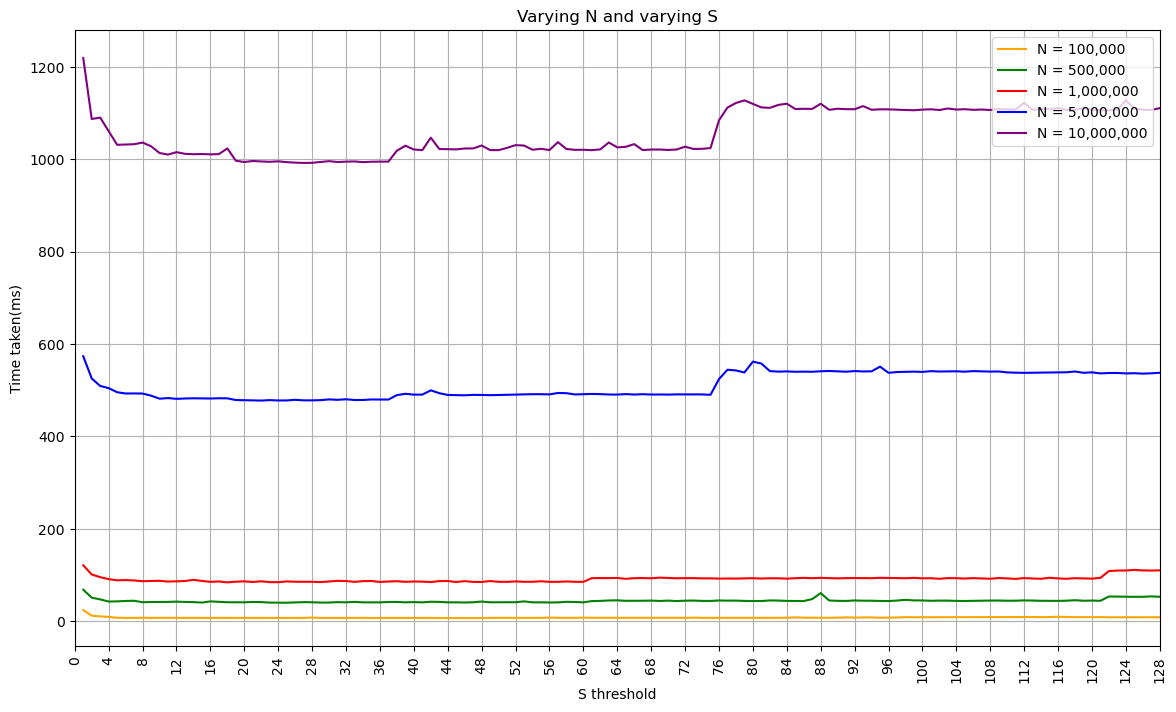

In [28]:
#Create a matplotlib plot
f = plt.figure(figsize = (14,8))
ax = f.add_subplot(1,1,1)

plt.title('Varying N and varying S')
plt.xlabel('S threshold')
plt.ylabel('Time taken(ms)')
plt.xticks(rotation = 90)
plt.grid()

interval_step = 4
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(interval_step))
#increase x and y limits
ax.set_xlim([0, 128])

ax.plot(N100k_varyingS_DF ["S"],N100k_varyingS_DF ["Time(ms)"], color = "orange", label = "N = 100,000")
ax.plot(N500k_varyingS_DF ["S"],N500k_varyingS_DF ["Time(ms)"], color = "green", label = "N = 500,000")
ax.plot(N1m_varyingS_DF ["S"],N1m_varyingS_DF ["Time(ms)"], color = "red", label = "N = 1,000,000")
ax.plot(N5m_varyingS_DF ["S"],N5m_varyingS_DF ["Time(ms)"], color = "blue", label = "N = 5,000,000")
ax.plot(N10m_varyingS_DF ["S"],N10m_varyingS_DF ["Time(ms)"],  color = "purple", label = "N = 10,000,000")

#plot legends
plt.legend(loc = "upper right")
plt.ticklabel_format(style='plain')